In [2]:
#Initializing all the library that will be utilized all throughout the project
import numpy as np                   #Import the numpy library for numerical operations
import pandas as pd                  #Import the pandas library for data manipulation and analysis
import seaborn as sns                #Import the seaborn library for statistical data visualization
import matplotlib.pyplot as plt      #Import the pyplot module from matplotlib for plotting graphs

In [3]:
#Read the CSV file and store in a dataframe named spotify
spotify = pd.read_csv('spotify-2023-1.csv', encoding='utf-8')
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Overview of Dataset
#### 1. How many rows and columns does the dataset contain?#### 2. What are the data types of each column? Are there any missing values??

In [17]:
#Display the number of columns and rows the spotfiy database has
print(f"There are a total of {spotify.shape[0]} rows and {spotify.shape[1]} columns in the spotify dataset.")

#Function to filter columns by converting them to integers and treating NaNs and 0s as missing values
def filter_column(column):
    #Convert the column to numeric, treating errors as NaN
    column = pd.to_numeric(column, errors='coerce')
    #Replace NaN with 0 and convert to an integer
    column = column.fillna(0).astype('int64')
    return column

# Apply the filtering function to relevant columns to avoid errors
to_clean = [
    'streams', 'in_shazam_charts', 'in_deezer_playlists', 
    'acousticness_%', 'instrumentalness_%'
]
for col in to_clean:
    spotify[col] = filter_column(spotify[col])

#Considering Nan and 0 as a missing value
#Count zeros
zero_values = (spotify == 0).sum()  
#Count NaNs
empty_cells = spotify.isnull().sum() 

#Get the total count of missing values
total_missing_values = zero_values + empty_cells

# Create a summary DataFrame for better visualization
summary = pd.DataFrame({
    "Column Name": spotify.columns.str.ljust(20),
    "Data Type": spotify.dtypes.values,
    "Missing Values": total_missing_values.values  #Combine both counts here
})

#Prints the summary of data types and missing values
print("\nSummary of Data Types and Missing Values:\n")
print(summary.to_string(index=False, justify='left'))


There are a total of 953 rows and 24 columns in the spotify dataset.

Summary of Data Types and Missing Values:

Column Name          Data Type  Missing Values
track_name           object      0            
artist(s)_name       object      0            
artist_count          int64      0            
released_year         int64      0            
released_month        int64      0            
released_day          int64      0            
in_spotify_playlists  int64      0            
in_spotify_charts     int64    405            
streams               int64      1            
in_apple_playlists    int64     23            
in_apple_charts       int64    100            
in_deezer_playlists   int64     24            
in_deezer_charts      int64    558            
in_shazam_charts      int64    401            
bpm                   int64      0            
key                  object     95            
mode                 object      0            
danceability_%        int64      0       

#### Insights:
The generated output presents a table listing each column's name, data type, and the count of missing values, if any. Additionally, it shows the total number of rows and columns in the Spotify dataset, which contains 953 rows and 24 columns. Based on the results, there are numerous missing values, particularly in the instrumentalness_% column.

## Basic Descriptive Statistics
#### 1. What are the mean, median, and standard deviation of the streams column?
#### 2. What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

Streams Descriptive Statistics:
Mean: 513,597,931
Median: 290,228,626
Standard Deviation: 566,803,887


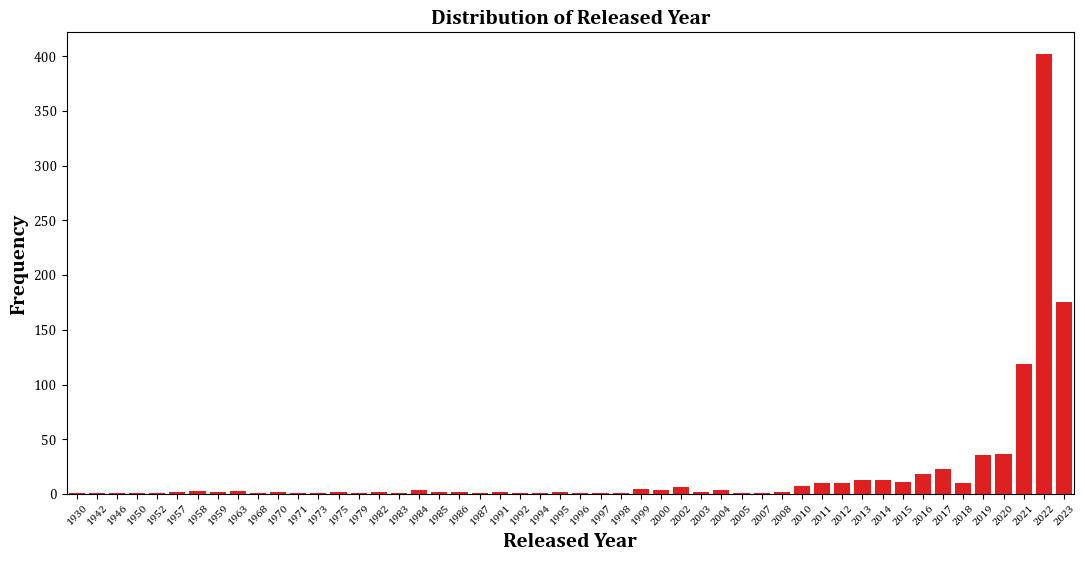


Most released year: 2022 with 402 tracks


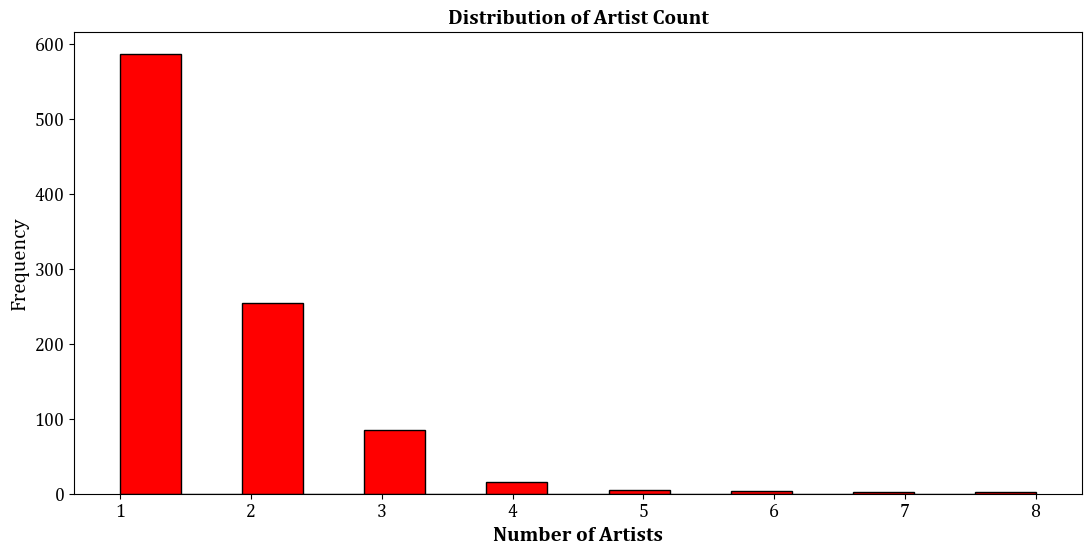


Most frequent number of artists: 1 with 587 tracks


In [21]:
#This ensures that the data on streams column contains clean numeric data, which is necessary for visualizations. 
#This exclude invalid data for the analysis
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

#Drop rows where the data could not be converted to a number
spotify = spotify.dropna(subset=['streams'])

#Calculating mean, median, and standard deviation using built-in functions.
spotify_streams_mean = spotify['streams'].mean()
spotify_streams_median = spotify['streams'].median()
spotify_streams_std = spotify['streams'].std()

#Displaying the mean, median, and standard deviation result as a whole number 
print("Streams Descriptive Statistics:")
print(f"Mean: {spotify_streams_mean:,.0f}")
print(f"Median: {spotify_streams_median:,.0f}")
print(f"Standard Deviation: {spotify_streams_std:,.0f}")

#Distribution for released year
#This determines the size of the graph
plt.figure(figsize=(13, 6))
#Count the frequency for each year and setting the bar color to red
sns.countplot(data=spotify, x='released_year', color='red')
plt.title('Distribution of Released Year',fontsize=15,fontfamily='cambria',fontweight='bold')    #Setting the title of the graph as well as its fontsize, fontstyle, and fontweight
plt.xlabel('Released Year',fontsize=15,fontfamily='cambria',fontweight='bold')                   #Setting the label of the x-axis as well as its fontsize and fontstyle
plt.ylabel('Frequency',fontsize=15,fontfamily='cambria',fontweight='bold')                       #Setting the label of the y-axis as well as its fontsize and fontstyle
plt.xticks(rotation=45,fontsize=8,fontfamily='cambria')                        #Setting the label of the data on the x-axis, as well as its angle, font size, and font style.
plt.yticks(fontsize=10,fontfamily='cambria')                                   #Setting the label of the data on the y-axis, as well as its font size and font style.
plt.show()                                                                     #Displays the chart

released_year_counts = spotify['released_year'].value_counts()                 #Count the number of releases per year
most_released_year = released_year_counts.idxmax()                             #Find which year has the highest count of released track
most_released_year_count = released_year_counts.max()                          #Get the highest count of released track
print(f"\nMost released year: {most_released_year} with {most_released_year_count} tracks")    #Display the results obtained

# Distribution for artist count
#This determines the size of the graph
plt.figure(figsize=(13, 6))
#A histogram graph is being utilized. It also check for any discrepancies
plt.hist(spotify['artist_count'].dropna(),bins=15,color='red',edgecolor='black')
plt.title('Distribution of Artist Count',fontsize=15,fontfamily='cambria',fontweight='bold')           #Setting the title of the graph as well as its fontsize, fontstyle, and fontweight
plt.xlabel('Number of Artists',fontsize=15,fontfamily='cambria',fontweight='bold')                     #Setting the label of the x-axis as well as its fontsize and fontstyle
plt.ylabel('Frequency',fontsize=15,fontfamily='cambria')                             #Setting the label of the y-axis as well as its fontsize and fontstyle
plt.xticks(fontsize=13,fontfamily='cambria')                                         #Setting the label of the data on the x-axis, as well as its font size and font style.
plt.yticks(fontsize=13,fontfamily='cambria')                                         #Setting the label of the data on the y-axis, as well as its font size and font style.
plt.show()                                                                           #Displays the chart

artist_count = spotify['artist_count'].mode()[0]                                       #Finds the most common value
artist_count_frequency = (spotify['artist_count'] == artist_count).sum()          #Calculates how often this mode value appears in the column.

# Print the most frequent artist count and how many tracks have that count
print(f"\nMost frequent number of artists: {artist_count} with {artist_count_frequency} tracks")


#### Insights:
The descriptive statistics on streams suggest a right-skewed distribution with a small number of popular songs, which receive an equal amount of streams. Most songs likely have stream counts closer to the median, with only a few reaching numbers near or above the mean.

Regarding the distribution of released year, there has been an increase in songs released in recent years, especially from around 2020 onwards, indicating a surge in releases during this period. The frequency of releases in the latest years is an outlier compared to previous years, suggesting an accelerated rate of releases.

On the other side, the distribution of artist count is heavily skewed toward single-artist releases, implying that most songs involve only one artist. Fewer collaborative releases are evident as more artists join, making these multi-artist collaborations rare occurrences.

##  Top Performers
#### 1. Which track has the highest number of streams? Display the top 5 most streamed tracks?
#### 2. Who are the top 5 most frequent artists based on the number of tracks in the dataset?

Most Streamed Track:
Track Name: Blinding Lights
Artist: The Weeknd
Streams: 3,703,895,074


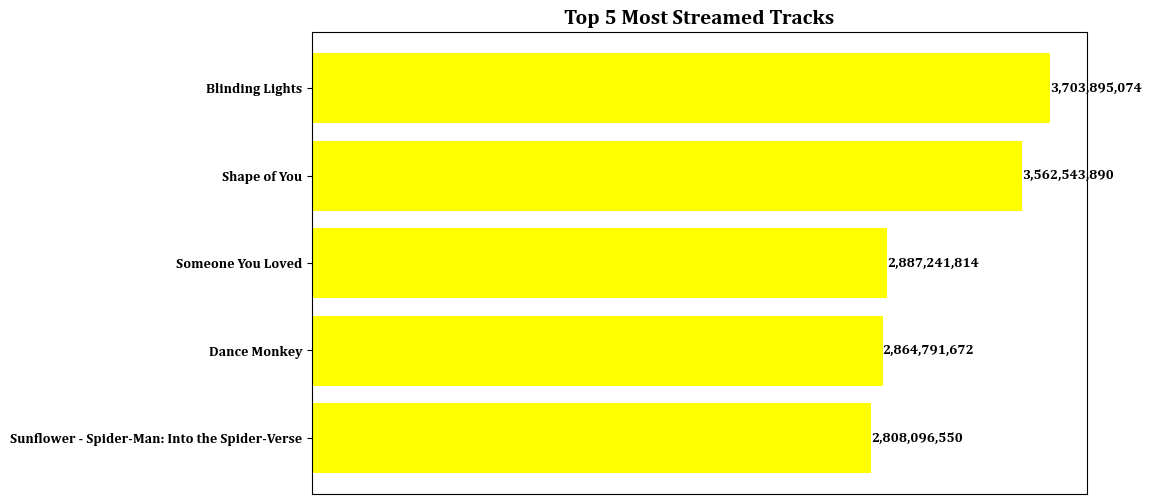

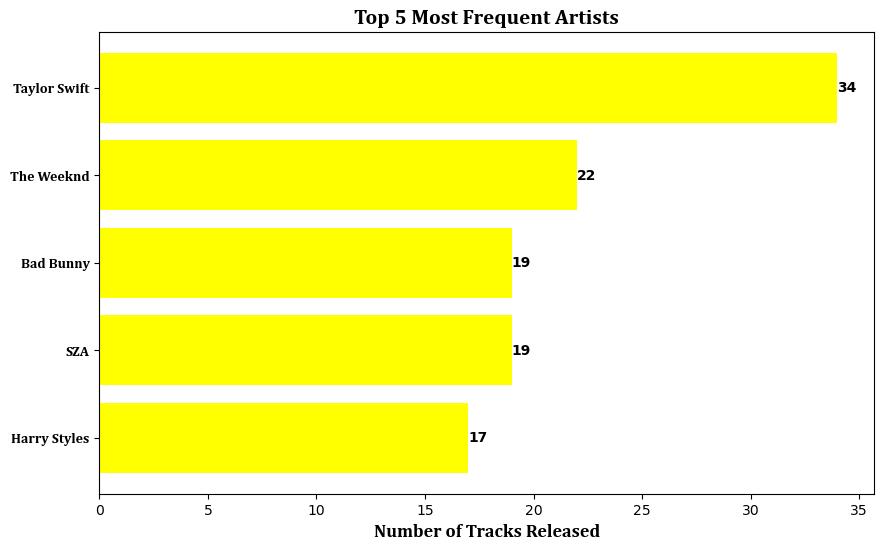

In [23]:
# Find the track with the highest number of streams
highest_stream = spotify.loc[spotify['streams'].idxmax()]

#Display the information regarding the highest number of streams
print("Most Streamed Track:")
print("Track Name:", highest_stream['track_name'])
print("Artist:", highest_stream['artist(s)_name'])
print("Streams:", f"{int(highest_stream['streams']):,}")  #This line of code makes the number of streams presentable by putting commas

#Get the top 5 most streamed tracks
top5_stream = spotify.nlargest(5, 'streams')

#Provides a graph representing the top 5 most streamed tracks to make it presentable
#Determines the size of the graph
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_stream['track_name'], top5_stream['streams'], color='yellow')          #Create a horizontal bar to show the track name and the number of streams it has
plt.title("Top 5 Most Streamed Tracks",fontsize=15,fontfamily='cambria',fontweight='bold')  #Setting the title of the graph as well as its fontsize, fontstyle, and fontweight
plt.yticks(fontsize=10, fontfamily='cambria',fontweight='bold')                             #Setting the track's name its fontsize, fontstyle, and fontweight.
plt.gca().invert_yaxis()                                                                    #Invert y-axis for descending order display
plt.gca().xaxis.set_visible(False)                                                          #Makes x-axis ticks invisible for a more appealing graph

# Add annotations or labels on the horizontal bar as well as its fontsize and fontstyle
plt.bar_label(bars, labels=[f"{int(width):,}" for width in top5_stream['streams']],fontsize=10, fontfamily='Cambria',fontweight='bold')

#Displays the chart
plt.show()

#Grouping the artist name and counting their number of tracks then extracting the top 5 artists
top5_artists = spotify['artist(s)_name'].value_counts().head(5)

# Plotting the horizontal bar chart
# Determines the size of the graph
plt.figure(figsize=(10, 6))
#Creates a horizontal bar chart, the .index contains the names of the artist on y-axis. 
#On the other hand, .values contains the corresponding number of tracks on x-axis.
bars = plt.barh(top5_artists.index, top5_artists.values, color='yellow')      
plt.title("Top 5 Most Frequent Artists", fontsize=15,fontfamily='cambria',fontweight='bold')     #Setting the title of the graph as well as its fontsize, fontstyle, and fontweight
plt.yticks(fontsize=10, fontfamily='cambria',fontweight='bold')                                  #Setting the artist's name its fontsize, fontstyle, and fontweight.
plt.gca().invert_yaxis()                                                                         #Invert y-axis for descending order display
plt.xlabel("Number of Tracks Released", fontsize=13, fontfamily='cambria', fontweight='bold')    #Label the x-axis for a more understandable graph

#Display the number of tracks for each artist on the horizontal bar
plt.bar_label(bars, fontsize=10,fontweight='bold')

#Displays the chart
plt.show()

#### Insights:
The "Top 5 Most Streamed Tracks" graph showcases songs with high streaming numbers, each accumulating billions of plays. Leading this list is "Blinding Lights" by The Weeknd, which has surpassed 3.7 billion streams, closely followed by Ed Sheeran's "Shape of You." In the "Top 5 Most Frequent Artists" graph, Taylor Swift ranks first with a total of 34 tracks. Together, these charts highlight both individual tracks that capture massive audiences and artists who maintain high visibility in the music streaming landscape through frequent releases.

## Temporal Trends
#### 1. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
#### 2. Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

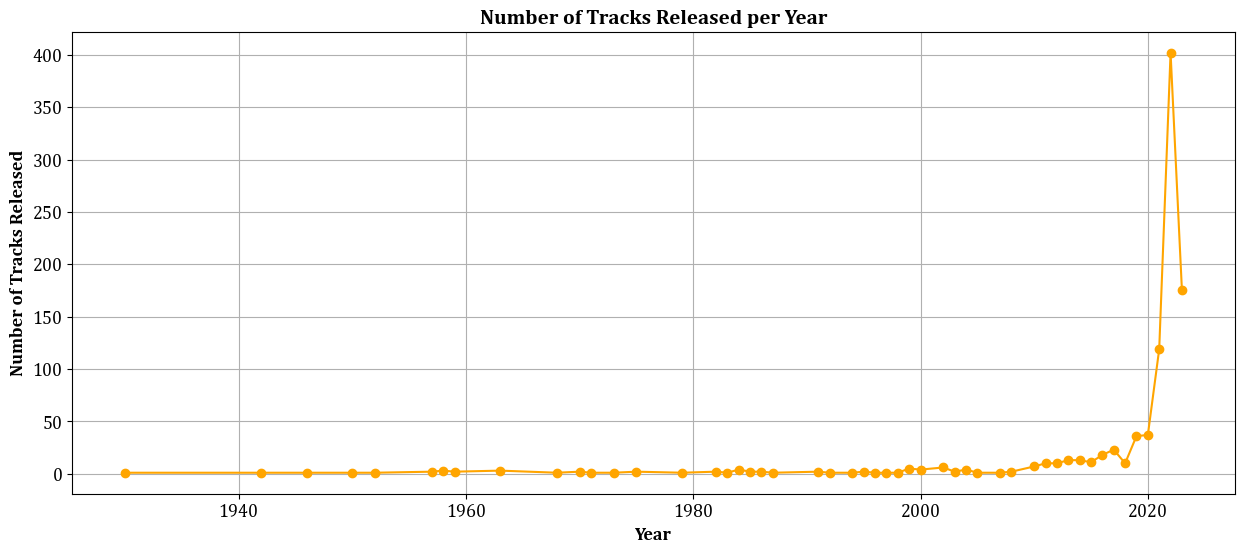

The year 2022 had the most releases with 402 tracks.


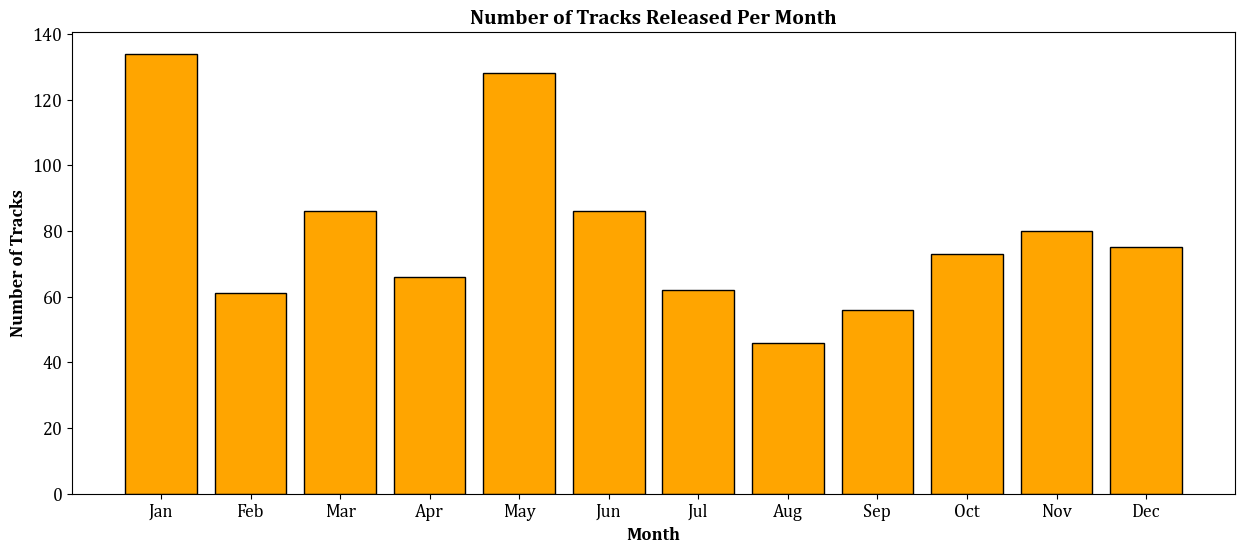

January had the highest number of releases with 134 tracks.


In [25]:

#Group the data by released_year and count the number of tracks per year
tracks_year = spotify.groupby('released_year').size()

#Plotting the trend
plt.figure(figsize=(15, 6))
plt.plot(tracks_year.index, tracks_year.values, marker='o', linestyle='-', color='orange')                  #Create a plot with specific markers
plt.title("Number of Tracks Released per Year",fontfamily='cambria',fontsize=15,fontweight='bold')          #Create a title for the graph and customizing it
plt.xlabel("Year",fontfamily='cambria',fontsize=13,fontweight='bold')                                       #Label the x-axis
plt.ylabel("Number of Tracks Released",fontfamily='cambria',fontsize=13,fontweight='bold')                  #Label the y-axis
plt.xticks(fontsize=13,fontfamily='cambria')                                                                #Customizing the fontsize and fontfamily for the x-axis ticks
plt.yticks(fontsize=13,fontfamily='cambria')                                                                #Customizing the fontsize and fontfamily for the y-axis ticks
plt.grid(True)                                                                                              #Display a grid for better visualization
plt.show()                                                                                                  #Display the plot

#Get the year with highest number of tracks released
max_year = tracks_year.idxmax()
#Get the maximum number tracks released in that year
max_count = tracks_year.max()

#Display the result
print(f"The year {max_year} had the most releases with {max_count} tracks.")

#Labeling for months for displaying the results
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
               7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

#Count the number of tracks released per month
tracks_month = spotify['released_month'].value_counts().sort_index()

#Plot the number of tracks released per month and setting the size of the graph for better visualization
plt.figure(figsize=(15, 6))
#Create a vertical bar plot for the monthly releases
bars_month = plt.bar(tracks_month.index, tracks_month.values, color='orange',edgecolor='black')
plt.title('Number of Tracks Released Per Month',fontfamily='cambria',fontsize=15,fontweight='bold')          #Create a title for the graph and customizing it
plt.xlabel('Month',fontfamily='cambria',fontsize=13,fontweight='bold')                                       #Label the x-axis
plt.ylabel('Number of Tracks',fontfamily='cambria',fontsize=13,fontweight='bold')                            #Label the y-axis
#Custom labels for the x-axis to display the month names
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],fontfamily='cambria', fontsize=13, rotation=0)
#Customizing the fontsize and fontfamily for the y-axis ticks
plt.yticks(fontsize=13,fontfamily='cambria')   
#Display the graph
plt.show()                                                                                 


# Identify the month with the most releases
max_month_index = tracks_month.idxmax()                         #Get the month number with the most releases using .idxmax
max_month_count = tracks_month.max()                            #Get the number of tracks for that month
max_month_name = month_names[max_month_index]                   #Get the month name

print(f"{max_month_name} had the highest number of releases with {max_month_count} tracks.")



#### Insights:
The graph showing the number of tracks released per year reveals a sharp rise in releases, particularly around 2020, with 2022 marking the peak year for track releases. Meanwhile, the monthly distribution of releases indicates that January had the highest number of releases, totaling 134 tracks. This pattern suggests seasonal trends in music release strategies, with higher numbers of releases at the beginning and middle of the year.

## Genre and Music Characteristics
#### 1. Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
#### 2. Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

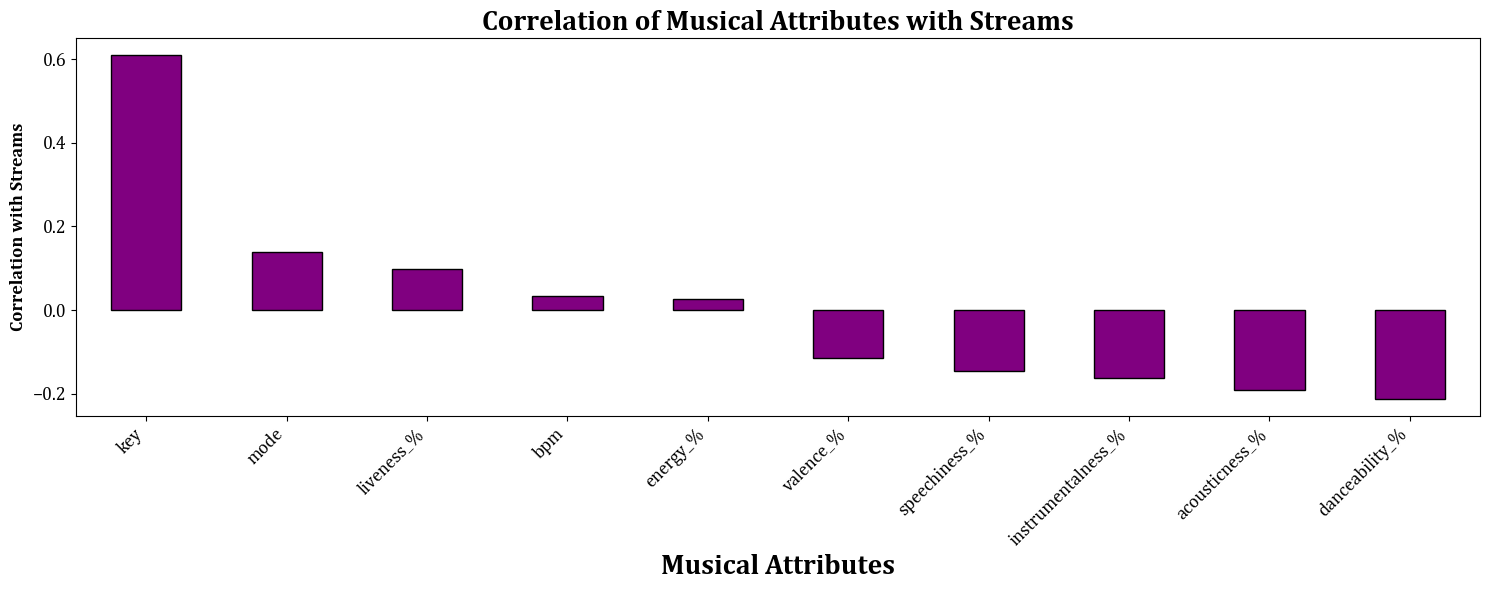

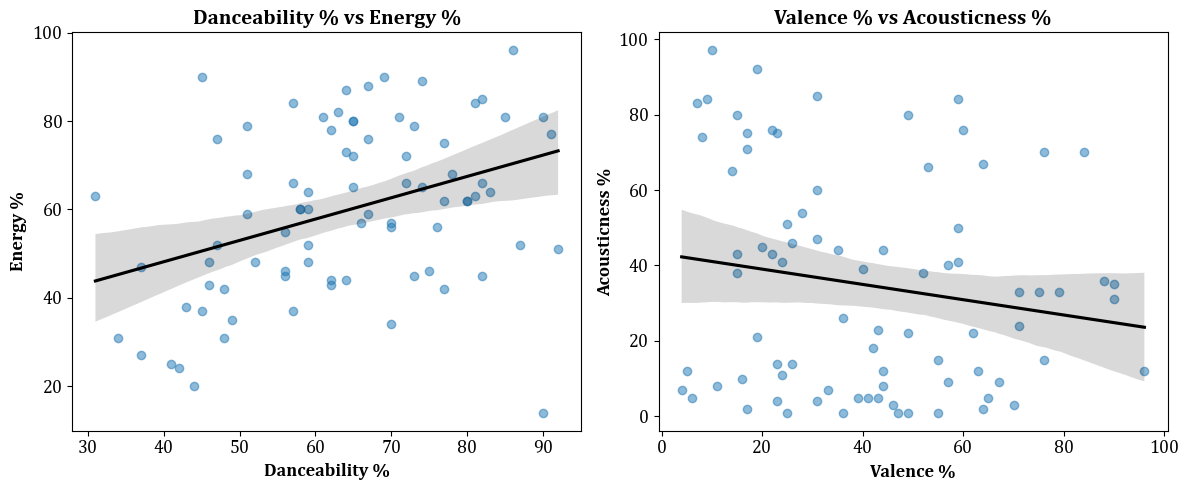

In [19]:
#Convert streams column to numeric to ensure it's processed correctly and avoid errors
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

#Replace missing data and zero values with NaN and removing them
spotify[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 
         'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']] = spotify[
    ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 
     'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
].replace(0, np.nan).dropna()

#To get a numerical to correlate with streams, group the key and mode and getting its average
key_avg_streams = spotify.groupby('key')['streams'].mean()
mode_avg_streams = spotify.groupby('mode')['streams'].mean()

#Place the average streams back to the original dataframe for correlation
spotify['key'] = spotify['key'].map(key_avg_streams)
spotify['mode'] = spotify['mode'].map(mode_avg_streams)

#List required columns for interpretation
attributes = ['streams', 'bpm', 'key', 'mode', 'danceability_%', 
              'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
              'liveness_%', 'speechiness_%']

#Calculate the correlation
correlation_matrix = spotify[attributes].corr()

#Display sorted correlation values for 'streams' 
streams_corr = correlation_matrix['streams'].sort_values(ascending=False)

# Plot the correlation of each attribute with streams
plt.figure(figsize=(15, 6))
streams_corr.drop('streams').plot(kind='bar', color='purple', edgecolor='black')
plt.title("Correlation of Musical Attributes with Streams",fontfamily='cambria',fontsize=20,fontweight='bold')      #Create a title for the graph
plt.xlabel("Musical Attributes",fontfamily='cambria',fontsize=20,fontweight='bold')                                 #Label the x-axis
plt.ylabel("Correlation with Streams",fontfamily='cambria',fontsize=13,fontweight='bold')                           #Label the y-axis
plt.xticks(rotation=45, ha='right',fontfamily='cambria',fontsize=13)                                                #Customizing the fontsize and fontfamily for the x-axis ticks
plt.yticks(fontfamily='cambria',fontsize=13)                                                                        #Customizing the fontsize and fontfamily for the y-axis ticks
plt.tight_layout()                                                                                                  #Adjust elements to fit 
#Display the plot
plt.show()


#Convert involved columns to numeric to handle any potential issues
spotify['danceability_%'] = pd.to_numeric(spotify['danceability_%'], errors='coerce')
spotify['energy_%'] = pd.to_numeric(spotify['energy_%'], errors='coerce')
spotify['valence_%'] = pd.to_numeric(spotify['valence_%'], errors='coerce')
spotify['acousticness_%'] = pd.to_numeric(spotify['acousticness_%'], errors='coerce')

#Replacing the 0 and NaN values and removing them from the graph to avoid errors
spotify[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']] = spotify[
    ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
].replace(0, np.nan).dropna()

#Graphing scatter plots for each pair with a regression line
plt.figure(figsize=(12, 5))

# Scatter plot for danceability_% vs energy_%
plt.subplot(1, 2, 1)
sns.regplot(x='danceability_%', y='energy_%', data=spotify, scatter_kws={'alpha':0.5}, line_kws={'color': 'black'})
plt.title("Danceability % vs Energy %",fontfamily='cambria',fontsize=15,fontweight='bold')                                         #Create a title for the graph
plt.xlabel("Danceability %",fontfamily='cambria',fontsize=13,fontweight='bold')                                                    #Label the x-axis
plt.ylabel("Energy %",fontfamily='cambria',fontsize=13,fontweight='bold')                                                          #Label the y-axis
plt.xticks(fontfamily='cambria',fontsize=13)                                                                                       #Formatting the x-axis ticks
plt.yticks(fontfamily='cambria',fontsize=13)                                                                                       #Formatting the y-axis ticks

# Scatter plot for valence_% vs acousticness_%
plt.subplot(1, 2, 2)
sns.regplot(x='valence_%', y='acousticness_%', data=spotify, scatter_kws={'alpha':0.5}, line_kws={'color': 'black'})
plt.title("Valence % vs Acousticness %",fontfamily='cambria',fontsize=15,fontweight='bold')                                     #Create a title for the graph
plt.xlabel("Valence %",fontfamily='cambria',fontsize=13,fontweight='bold')                                                      #Label the x-axis
plt.ylabel("Acousticness %",fontfamily='cambria',fontsize=13,fontweight='bold')                                                 #Label the x-axis
plt.xticks(fontfamily='cambria',fontsize=13)                                                                                    #Formatting the y-axis ticks
plt.yticks(fontfamily='cambria',fontsize=13)                                                                                    #Formatting the y-axis ticks
plt.tight_layout()                                                                                                              #Adjust elements to fit
#Display the plot
plt.show() 

#### Insights
Key and Mode appear to have the most influence on streaming numbers, with key showing a notable correlation. This could mean that listeners may favor certain tonalities or moods associated with specific keys and modes.
Liveness and other musical attributes contribute less significantly, with generally weak correlations, indicating that these factors alone are not major predictors of streaming success. 

Based on the Danceability and Energy correlation. They are somewhat positively correlated, meaning more danceable songs tend to be energetic.
On the Valence and Acousticness correlation, it shows a weak inverse relationship, implying that more positive-sounding songs are minimally less acoustic, but the trend is not strong.

##  Platform Popularity
#### 1. How do the numbers of tracks in spotify_playlists, deezer_playlists, and apple_playlists compare? Which platform seems to favor the most popular tracks?


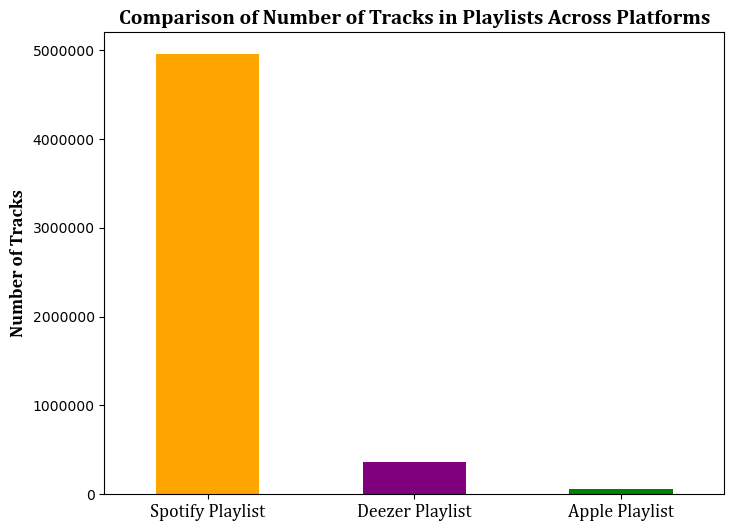


The platform that favors the most popular tracks (highest total streams): Spotify


In [27]:
# Function to clean and filter columns, it removes commas and converts to numeric
def clean_column(column):
    column = column.astype(str)                             #Convert to string to handle non-numeric values
    column = column.str.replace(',', '')                    #Remove commas from numbers
    return pd.to_numeric(column, errors='coerce')           #Convert back to numbers, replace non-convertible with NaN
    
#Ensure the playlist columns are numeric
platform_columns = ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']
spotify[platform_columns] = spotify[platform_columns].apply(clean_column)

#Clean the 'streams' column
spotify['streams'] = clean_column(spotify['streams'])

#Sums only the non-zero and non-NaN values
playlist_counts = spotify[platform_columns].where(spotify[platform_columns] > 0).sum()

#Calculate the total streams for each platform by summing streams where a track is in the playlist
streams_spotify = spotify.loc[spotify['in_spotify_playlists'] > 0, 'streams'].sum()
streams_deezer = spotify.loc[spotify['in_deezer_playlists'] > 0, 'streams'].sum()
streams_apple = spotify.loc[spotify['in_apple_playlists'] > 0, 'streams'].sum()

#Determine the platform that favors the most popular tracks 
streaming_platforms = {
    'Spotify': streams_spotify,
    'Deezer': streams_deezer,
    'Apple': streams_apple
}
famous_platform = max(streaming_platforms, key=streaming_platforms.get)

# Plot the comparison of the number of tracks in playlists across platforms
plt.figure(figsize=(8, 6))
playlist_counts.plot(kind='bar', color=['orange', 'purple', 'green'])
# Set the title, labels and xticks
plt.title("Comparison of Number of Tracks in Playlists Across Platforms",fontsize=15,fontfamily='cambria',fontweight='bold')
plt.ylabel("Number of Tracks",fontsize=13,fontfamily='cambria',fontweight='bold')
plt.xticks(ticks=range(len(playlist_counts)), labels=["Spotify Playlist", "Deezer Playlist", "Apple Playlist"], rotation=0,fontsize=13,fontfamily='cambria')

# Remove scientific notation from Y-axis
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

# Print out the platform that favors the most popular tracks
print(f"\nThe platform that favors the most popular tracks (highest total streams): {famous_platform}")


#### Insights:
Spotify leads with nearly 5 million tracks in playlists, highlighting its popularity. In comparison, Deezer has significantly fewer tracks, and Apple Music features even fewer, suggesting a lesser focus on playlists. This data underscores Spotify's dominance in music discovery and playlisting, while other platforms struggle to compete with its vast database.

## Advanced Analysis
#### 1. Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
#### 2. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

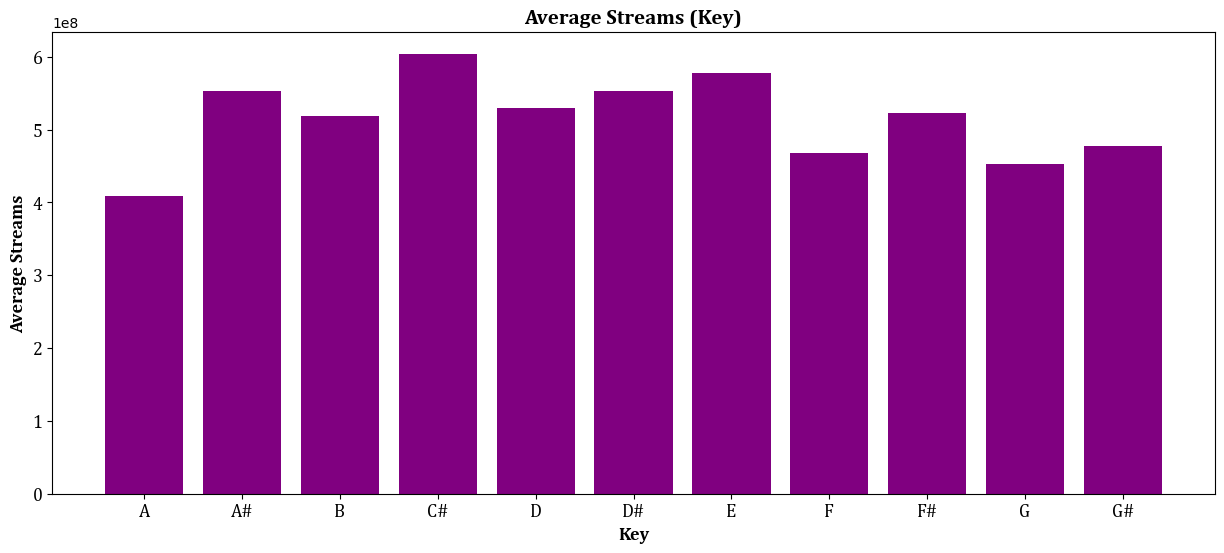

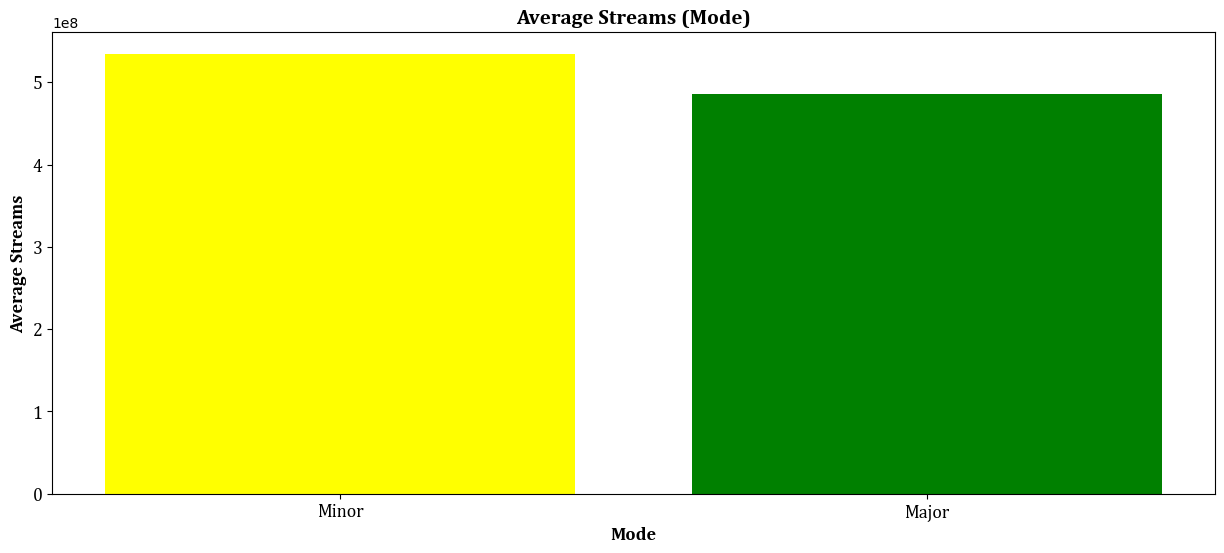

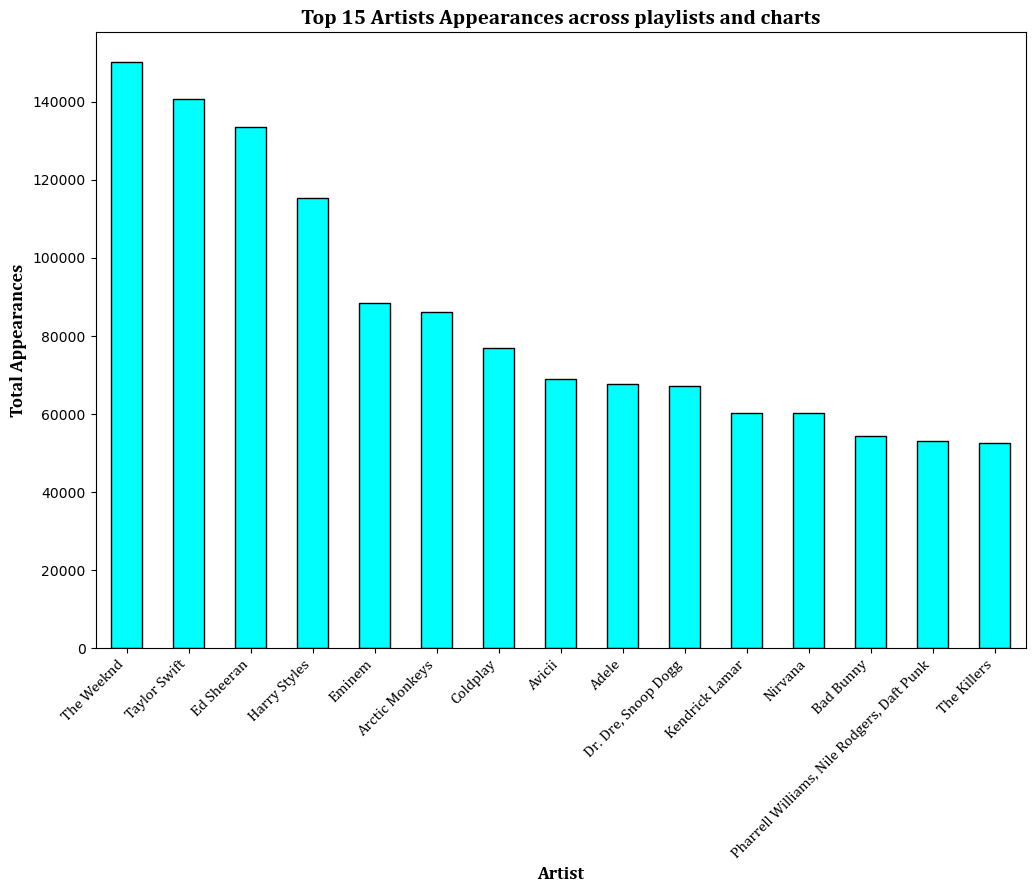

In [33]:
#Grouping by key and calculating the average streams per key
key = spotify.groupby('key')['streams'].mean().sort_index()

#Grouping by mode and calculating the average streams per mode
mode = spotify.groupby('mode')['streams'].mean()

#Plotting average streams per key
#Set figure size for plot
plt.figure(figsize=(15, 6))
plt.bar(key.index, key.values,color=['purple'])                                      #Create bar plot for average streams per key
plt.title('Average Streams (Key)',fontsize=15,fontfamily='cambria',fontweight='bold')            #Create a title for the graph and styling
plt.xlabel('Key',fontsize=13,fontfamily='cambria',fontweight='bold')                             #Label the x-axis
plt.ylabel('Average Streams',fontsize=13,fontfamily='cambria',fontweight='bold')                 #Label the y-axis
plt.xticks(fontsize=13,fontfamily='cambria')                                                     #Customizing the fontsize and fontfamily for the x-axis ticks
plt.yticks(fontsize=13,fontfamily='cambria')                                                     #Customizing the fontsize and fontfamily for the y-axis ticks
plt.show()                                                                                       #Display the plot

#Plotting average streams per mode (0 = Minor, 1 = Major)
plt.figure(figsize=(15, 6))                                                                 #Set figure size for plot
mode_labels = ['Minor', 'Major']                                                            #Define labels for mode categories
plt.bar(mode_labels, mode.values, color=['yellow', 'green'])                          #Create bar plot for average streams per mode
plt.title('Average Streams (Mode)',fontsize=15,fontfamily='cambria',fontweight='bold')      #Create a title for the graph and styling
plt.xlabel('Mode',fontsize=13,fontfamily='cambria',fontweight='bold')                       #Label the x-axis
plt.ylabel('Average Streams',fontsize=13,fontfamily='cambria',fontweight='bold')            #Label the y-axis
plt.xticks(fontsize=13,fontfamily='cambria')                                                #Customizing the fontsize and fontfamily for the x-axis ticks
plt.yticks(fontsize=13,fontfamily='cambria')                                                #Customizing the fontsize and fontfamily for the y-axis ticks
plt.show()


#Define columns involved in playlist/chart appearances and convert to numeric with non-numeric values set to 0
playlist_chart_columns = [
    'in_shazam_charts', 'in_deezer_playlists','in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts','in_deezer_charts'
]

#Convert each playlist or chart column to integer, filling non-numeric values with 0
for col in playlist_chart_columns:
    spotify[col] = pd.to_numeric(spotify[col], errors='coerce').fillna(0).astype(int)

#Calculating the total appearances in playlists and charts for each track
spotify['total_appearances'] = spotify[playlist_chart_columns].sum(axis=1)

#Grouping by artist name to calculate total appearance across playlists and charts
artist_appearances = spotify.groupby('artist(s)_name')['total_appearances'].sum()

#Identifying the top 15 artists with the most appearances
top_artists = artist_appearances.sort_values(ascending=False).head(15)

#Plotting the top artists based on their appearances in playlists and charts
plt.figure(figsize=(12, 8))
#Create bar plot for top artist appearances
top_artists.plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Top 15 Artists Appearances across playlists and charts',fontsize=15,fontfamily='cambria',fontweight='bold')           #Create a title for the graph and styling
plt.xlabel('Artist',fontsize=13,fontfamily='cambria',fontweight='bold')                                                          #Label the x-axis
plt.ylabel('Total Appearances',fontsize=13,fontfamily='cambria',fontweight='bold')                                               #Label the y-axis
plt.xticks(rotation=45, ha='right',fontsize=11,fontfamily='cambria')                                                             #Rotate x-axis labels and customizing for readability
plt.show()                                                                                                                       #Display the plot


#### Insights

The key C# exhibits the highest average streams, indicating that tracks in this key generally perform better in terms of streaming numbers. In contrast, the key A shows relatively lower average streams compared to other keys, suggesting it may be less popular or have fewer tracks with high streaming counts. Overall, while there is some variation among the keys, most tend to cluster around similar average stream values.

Tracks in Minor mode have slightly higher average streams compared to those in Major mode. This could suggest that Minor mode tracks are more popular, have higher engagement, or contain more high-stream tracks on average than Major mode tracks. 

The graph "Top 15 Artists Appearances across Playlists and Charts" shows The Weeknd leading with over 140,000 appearances, followed closely by Taylor Swift and Ed Sheeran. Other significant artists include Harry Styles, Eminem, and Arctic Monkeys. In contrast, artists like Pharrell Williams, Nile Rodgers, Daft Punk, and The Killers show significantly fewer appearances. 